<a href="https://colab.research.google.com/github/Ashcom-git/arya-ai-sample/blob/main/arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries.

In [44]:
import pandas as pd
from sklearn.utils.extmath import randomized_svd
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

Connecting to Google drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting the necessary data.

In [4]:
!unzip '/content/drive/MyDrive/Arya_DataScientist_Assignment.zip'

Archive:  /content/drive/MyDrive/Arya_DataScientist_Assignment.zip
  inflating: training_set.csv        
  inflating: test_set.csv            


Reading the train and test files.

In [5]:
train_csv = pd.read_csv('/content/training_set.csv',index_col=0)
test_csv = pd.read_csv('/content/test_set.csv',index_col=0)

Printing the top rows and shape of the train and test sets.

In [ ]:
train_csv.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [ ]:
train_csv.shape

(3910, 58)

In [ ]:
test_csv.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [ ]:
test_csv.shape

(691, 57)

Checking the data for null values.

In [ ]:
train_csv.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_csv.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Describing the basic statistics of both the sets.

In [ ]:
train_csv.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

In [ ]:
test_csv.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.00000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,0.054255,0.473893,0.092894,0.066671,0.052938,0.261577,0.141491,0.180391,1.668669,0.095181,0.761708,0.172634,0.103357,0.089001,0.457352,0.258119,0.824935,0.122200,0.09097,0.089146,0.058495,0.049797,0.113907,0.050246,0.088423,0.115687,0.148119,0.011722,0.069247,0.063459,0.036353,0.093618,0.037554,0.063401,0.233734,0.163763,0.001997,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,0.193042,0.770257,0.287302,0.460284,0.278251,0.962487,0.443760,0.556946,1.860817,0.799695,1.146614,1.206941,0.374469,0.438095,1.259678,0.854455,3.617189,0.495914,0.50045,0.409787,0.368296,0.364195,0.647490,0.364229,0.406143,0.442055,0.497177,0.249035,0.491256,0.367637,0.267692,0.536883,0.177095,0.407094,0.637226,0.690451,0.031495,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.220000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.700000,0.000000,0.000000,0.000000,0.085000,0.000000,0.000000,2.660000,0.000000,1.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,4.540000,14.280000,5.100000,35.46

Printing the columns that contain the most number of zeros.

In [ ]:
train_zero_dict,test_zero_dict = {},{}
for i in test_csv.columns:
  train_zero_dict[i] = train_csv[i][train_csv[i]==0].count()
  test_zero_dict[i] = test_csv[i][test_csv[i]==0].count()

In [ ]:
sorted(train_zero_dict.items(),reverse=True, key=lambda x:x[1])[:10]

[('X4', 3871),
 ('X47', 3854),
 ('X38', 3836),
 ('X22', 3821),
 ('X41', 3784),
 ('X48', 3738),
 ('X32', 3734),
 ('X34', 3726),
 ('X31', 3661),
 ('X15', 3628)]

In [ ]:
sorted(test_zero_dict.items(),reverse=True, key=lambda x:x[1])[:10]

[('X47', 684),
 ('X4', 683),
 ('X38', 682),
 ('X41', 669),
 ('X22', 663),
 ('X32', 662),
 ('X34', 660),
 ('X48', 660),
 ('X44', 648),
 ('X31', 647)]

Since the dimensionality of the data is high, we'll plot it using parallel coordinates.

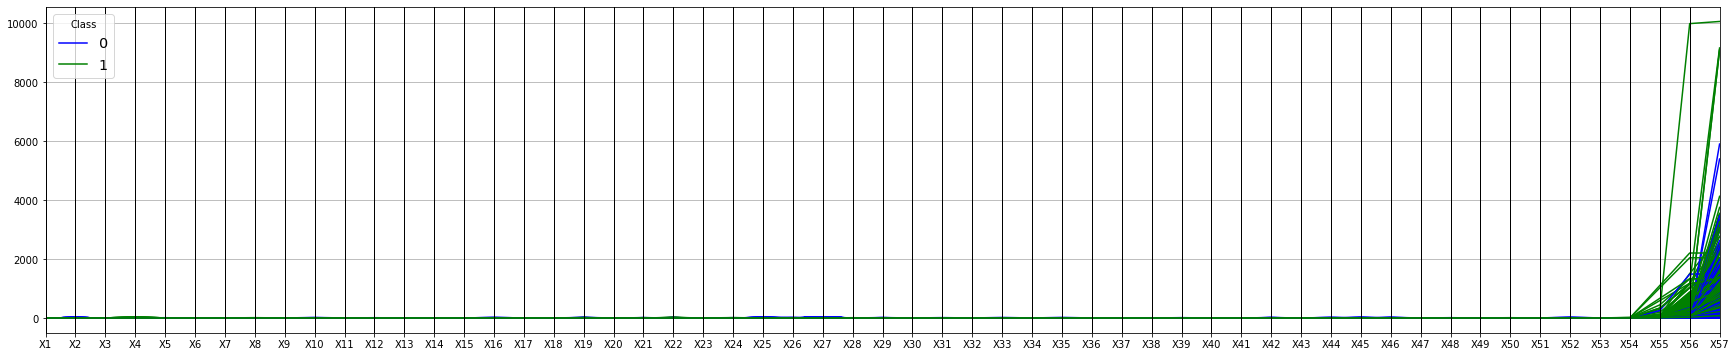

In [ ]:
plt.figure(figsize=(30,6))
pd.plotting.parallel_coordinates(train_csv,'Y',color=('blue','green'))
plt.legend(loc='upper left', title='Class',fontsize='x-large')
plt.show()

All values don't have the same order of magnitude. That's why we'll standardize them.

In [6]:
std = StandardScaler()
std.fit(train_csv.values[:,:-1])
train_std = std.transform(train_csv.values[:,:-1])
test_std = std.transform(test_csv.values)

Applying singular value decomposition to split the large data matrix into smaller matrices.

In [8]:
sparse_mat = scipy.sparse.csr_matrix(np.concatenate((train_std,test_std),axis=0))

In [9]:
U,S,VT = randomized_svd(sparse_mat,min(sparse_mat.shape[0],sparse_mat.shape[1]),random_state=42)

We'll calculate the optimal number of columns in the factorized matrix that captures the maximum variance using the hard threshold technique.

In [10]:
beta = min(sparse_mat.shape) / max(sparse_mat.shape)
omega_approx = 0.56*beta**3 - 0.95*beta**2 + 1.82*beta + 1.43
tau = np.median(S)*omega_approx
k = np.max(np.where(S>tau))+1

In [11]:
X_truncated = (U[:,:k]*S[:k])
X_truncated.shape

(4601, 3)

In [12]:
X_train = X_truncated[:train_csv.shape[0],:]
X_test = X_truncated[train_csv.shape[0]:,:]

In [13]:
X_train.shape, X_test.shape

((3910, 3), (691, 3))

Labels in the train set are slightly imbalanced but it isn't too severe. That's why we won't apply upsampling.

In [16]:
Y_train = train_csv.iloc[:,-1]
Y_train.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

We shall be choosing gradient boosted decision trees as the machine learning algorithm for predicting the data. For finding the best parameters, we'll using randomized search cross validation.

In [41]:
gbdt = GradientBoostingClassifier()
params={'n_estimators':[100,110,120,130],'max_depth':[3,4,5,6]}
rand = RandomizedSearchCV(gbdt,params,cv=4,scoring='accuracy',n_jobs=-1)
rand.fit(X_train,Y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

Printing the best parameters obtained from the search and the corresponding accuracy score.

In [42]:
rand.best_params_, rand.best_score_

({'max_depth': 5, 'n_estimators': 110}, 0.8777467122132149)

It is now time to predict evaludate our model on the train data.

In [43]:
gbdt = GradientBoostingClassifier(n_estimators=100,max_depth=6)
gbdt.fit(X_train, Y_train)
prediction = gbdt.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,